Análisis exploratorio de los datos EDA

* Visualizo encabezados
* Visualizo tipos de datos de las columnas
* Analizo la cantidad de datos faltantes
* Estadísticas descriptivas
* Reviso Correlaciones

In [1]:
#Impotamos librerias a usar
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd
import seaborn as sns

In [2]:
#abrimos el dataset
movies = pd.read_csv('data_movies.csv')

C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_16440\2561924068.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('data_movies.csv')


In [3]:
#Miro encabezado
movies.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,runtime,spoken_languages,status,tagline,title,vote_average,return,year,month,day
0,Toy Story Collection,30000000.0,"Animation, Comedy, Family",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,Pixar Animation Studios,United States of America,1995 / 10 / 30,...,81.0,English,Released,NaN,Toy Story,7.7,12.451801,1995.0,octubre,lunes
1,NaN,65000000.0,"Adventure, Fantasy, Family",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,1995 / 12 / 15,...,104.0,"English, Français",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,4.043035,1995.0,diciembre,viernes
2,Grumpy Old Men Collection,0.0,"Romance, Comedy",15602,en,A family wedding reignites the ancient feud be...,11.7129,"Warner Bros., Lancaster Gate",United States of America,1995 / 12 / 22,...,101.0,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,NaN,1995.0,diciembre,viernes
3,NaN,16000000.0,"Comedy, Drama, Romance",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,Twentieth Century Fox Film Corporation,United States of America,1995 / 12 / 22,...,127.0,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,5.090760,1995.0,diciembre,viernes
4,Father of the Bride Collection,0.0,Comedy,11862,en,Just when George Banks has recovered from his ...,8.387519,"Sandollar Productions, Touchstone Pictures",United States of America,1995 / 02 / 10,...,106.0,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,inf,1995.0,febrero,viernes


In [3]:
#Miramos los tipos de datos
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4491 non-null   object 
 1   budget                 45463 non-null  float64
 2   genres                 43024 non-null  object 
 3   id                     45466 non-null  object 
 4   original_language      45455 non-null  object 
 5   overview               44512 non-null  object 
 6   popularity             45461 non-null  object 
 7   production_companies   33585 non-null  object 
 8   production_countries   39178 non-null  object 
 9   release_date           45376 non-null  object 
 10  revenue                45460 non-null  float64
 11  runtime                45203 non-null  float64
 12  spoken_languages       41508 non-null  object 
 13  status                 45379 non-null  object 
 14  tagline                20412 non-null  object 
 15  ti

In [4]:
#Miramos los datos nulos o faltantes
movies.isnull().sum()

belongs_to_collection    40975
budget                       3
genres                    2442
id                           0
original_language           11
overview                   954
popularity                   5
production_companies     11881
production_countries      6288
release_date                90
revenue                      6
runtime                    263
spoken_languages          3958
status                      87
tagline                  25054
title                        6
vote_average                 6
return                   34549
year                        90
month                       90
day                         90
dtype: int64

In [6]:
#porcentaje de datos faltantes en total
print("El porcentaje de los datos faltantes en total es de:", round(movies.isnull().mean().mean() * 100, 1), "%")

El porcentaje de los datos faltantes en total es de: 13.3 %


Estadísticas descriptivas

*  La media Indica el valor típico de la columna, útil para tener una idea general de la distribución de los datos.
*  La desviación estándar mide la variabilidad de los datos alrededor de la media. Una desviación estándar grande indica que los datos están más dispersos alrededor de la media, mientras que una desviación estándar pequeña indica que los datos están más agrupados cerca de la media.
*  El valor mínimo y el valor máximo indican los límites del rango de valores observados.
*  Los cuartiles dividen los datos en cuatro partes iguales. El primer cuartil indica el valor que es mayor que el 25% de los valores en la columna. El segundo cuartil indica el valor que es mayor que el 50% de los valores en la columna. El tercer cuartil indica el valor que es mayor que el 75% de los valores en la columna.

In [5]:
#Miramos descripciones estadisticas del dataset
movies.describe()

,budget,revenue,runtime,vote_average,return,year
count,4.546300e+04,4.546000e+04,45203.000000,45460.000000,1.091700e+04,45376.000000
mean,4.224579e+06,1.120935e+07,94.128199,5.618207,inf,1991.881193
std,1.742413e+07,6.433225e+07,38.407810,1.924216,NaN,24.055360
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,1874.000000
25%,0.000000e+00,0.000000e+00,85.000000,5.000000,0.000000e+00,1978.000000
50%,0.000000e+00,0.000000e+00,95.000000,6.000000,1.273512e+00,2001.000000
75%,0.000000e+00,0.000000e+00,107.000000,6.800000,7.266667e+00,2010.000000
max,3.800000e+08,2.787965e+09,1256.000000,10.000000,inf,2020.000000


In [7]:
movies.corr()

C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_3584\1738869300.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  movies.corr()


,budget,revenue,runtime,vote_average,return,year
budget,1.000000,0.768776,0.134733,0.073494,-0.012564,0.131675
revenue,0.768776,1.000000,0.103917,0.083868,-0.005508,0.088355
runtime,0.134733,0.103917,1.000000,0.158146,-0.005188,0.078822
vote_average,0.073494,0.083868,0.158146,1.000000,0.013160,0.026138
return,-0.012564,-0.005508,-0.005188,0.013160,1.000000,-0.024790
year,0.131675,0.088355,0.078822,0.026138,-0.024790,1.000000


C:\Users\PERSONAL\AppData\Local\Temp\ipykernel_3584\3073148846.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(movies.corr(), annot=True, cmap='coolwarm')


<Axes: >

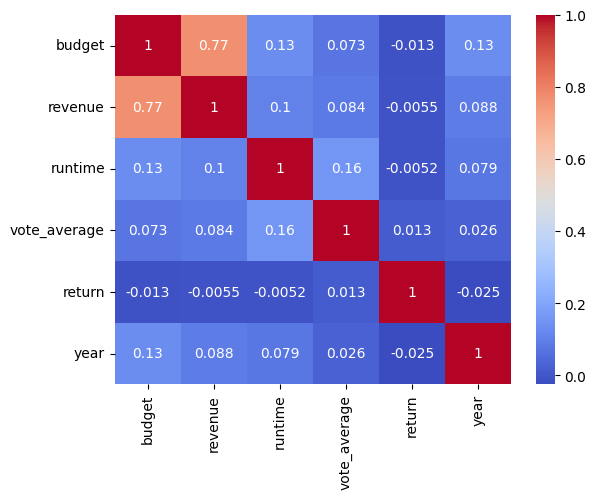

In [8]:
#miramos la correlacion 
sns.heatmap(movies.corr(), annot=True, cmap='coolwarm')
#este grafico nos muestra que hay poca corelacion entre los campos numericos, 
# exceptuando a budget y revenue que tiene una corelacion mayor a 0.7

In [4]:
#cambiamos a cadenas de texto
movies['title']=[str(word) for word in movies['title']]

In [5]:
#generamos la nube de palabras a usar para identificar las palabras mas usadas en los titulos
wordcloud = WordCloud(width=800, height=400).generate(' '.join(movies['title']))

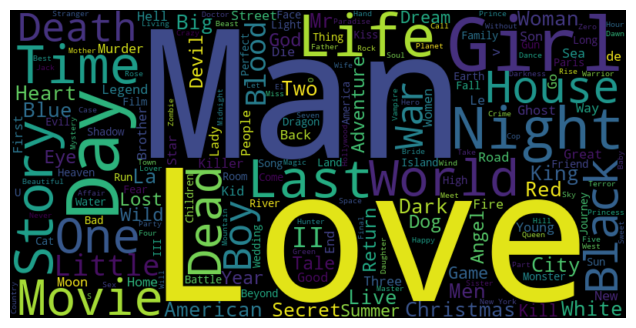

In [6]:
#graficamos la nube de palabras
plt.figure(figsize=(8, 4)) #creamos la nube con un tamaño personalizado
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off')
plt.show() #muestra la nube de palabras

In [9]:
#Convertimos la columna 'budget a numerica
movies = movies[pd.to_numeric(movies['budget'], errors='coerce').notnull()]

In [10]:
#Ponemos la columna como float
movies['budget'] = movies['budget'].astype(float)

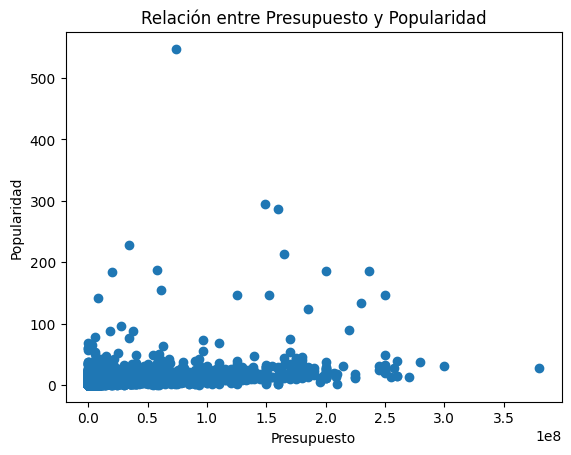

In [11]:
#grafico de relacion entre presupuesto y popularidad
plt.scatter(movies['budget'], movies['popularity'])
plt.title('Relación entre Presupuesto y Popularidad')
plt.xlabel('Presupuesto')
plt.ylabel('Popularidad')
plt.show()
#nos muestra que no existe una relacion directa en la popularidad el presupuesto de la pelicula

In [ ]:
# Convertirmos la columna 'release_date' a formato de fecha
movies['release_date'] = pd.to_datetime(movies['release_date'])

In [ ]:
# Agrupar las películas por año y contar el número de películas en cada año
movies_by_year = movies.groupby(movies['release_date'].dt.year)['title'].count()

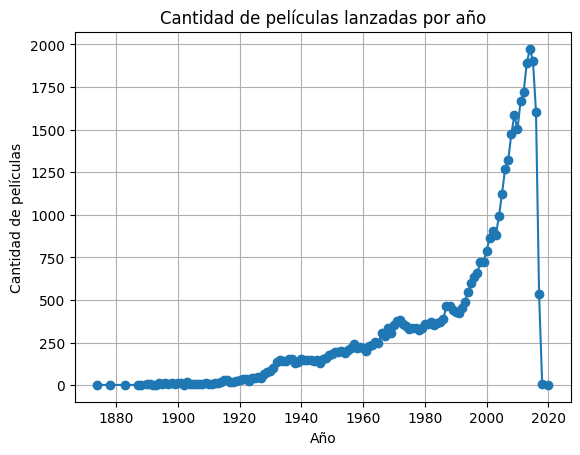

In [12]:

# Crear un gráfico de líneas para visualizar la cantidad de películas por año
plt.plot(movies_by_year.index, movies_by_year.values, marker='o')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.title('Cantidad de películas lanzadas por año')
plt.grid(True)
plt.show()
#podemos apreciar una clara relacion en la produccion de las peliculas a medida de los años
#observando un cambio abrupto para el 2020 que da un patron a estudiar interesante